In [4]:
# Import required libraries, and install them if not available
try: 
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
except:
    print(f'[INFO] Installing the required libraries')
    %pip install numpy pandas matplotlib seaborn
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

# Dataset
The Dataset consists of breakfast, lunch and dinner times for 2 people. It was collected over a period of 2 weeks. The format of the data is as follows: `Day`, `Start`, `Category`, `Company`, `Ordered`, `Event After`, `Duration`
- **Day**: Day of the week. $0 =$ Monday, $6 =$ Sunday
- **Start**: Breakfast in the mess starts at $7$:$30$, Lunch at $12$:$30$ and Dinner at $19$:$30$. This feature measures the time in minutes since the start of the meal when the person started eating.
- **Category**: Breakfast, Lunch or Dinner. $0 =$ Breakfast, $1 =$ Lunch, $2 =$ Dinner
- **Company**: $0 =$ Alone, $1 =$ With Company
- **Ordered**: $0 =$ Not Ordered, $1 =$ Ordered 
- **Event After**: $0 =$ No Event, $1 =$ Event (Event is a meeting, class, etc. that the person has to attend immediately after the meal)

There are $75$ samples in total. The goal is to predict the `Duration` of the meal. The `Duration` is measured in minutes and is the time elapsed between when the person started eating and when they finished.

In [5]:
# Load Dataset
data = pd.read_csv("final_data.csv", sep=',')
display(data)
# data.head(5)
print("# Present: ", data.shape[0])
print(data.info())

,Day,Start,Category,Company,Ordered,Event After,Duration
0,1,131,0,1,0,1,29
1,2,148,0,1,0,0,31
2,3,84,0,0,0,1,18
3,5,139,0,0,0,1,17
4,0,40,1,0,0,0,23
...,...,...,...,...,...,...,...
70,6,67,2,1,1,0,45
71,1,63,2,1,0,0,18
72,2,45,2,1,1,0,45
73,4,62,2,1,0,0,35


# Present:  75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Day          75 non-null     int64
 1   Start        75 non-null     int64
 2   Category     75 non-null     int64
 3   Company      75 non-null     int64
 4   Ordered      75 non-null     int64
 5   Event After  75 non-null     int64
 6   Duration     75 non-null     int64
dtypes: int64(7)
memory usage: 4.2 KB
None


In [87]:
def prep_arr(des:np.ndarray):
    """Prepares arrays for plotting
    Args:
        des (np.ndarray): Array of food data
    Returns:
        x (list): Day of the week
        y (list): Average duration of meals on that day
        max_duration (list): List of maximum duration of food types by day
        min_duration (list): List of minimum duration of food types by day
    """
    count = np.zeros(7)
    duration = np.zeros(7)
    max_duration, min_duration = np.zeros(7), np.full(7, float('inf'))
    x = []
    y = []

    for i in des:
        count[i[0]] += 1
        duration[i[0]] += i[1]
        max_duration[i[0]] = max(max_duration[i[0]], i[1])
        min_duration[i[0]] = min(min_duration[i[0]], i[1])

    for i in range(len(count)):
        if count[i] != 0:
            x.append(i)
            y.append(duration[i]/count[i])

    return x, y, max_duration, min_duration

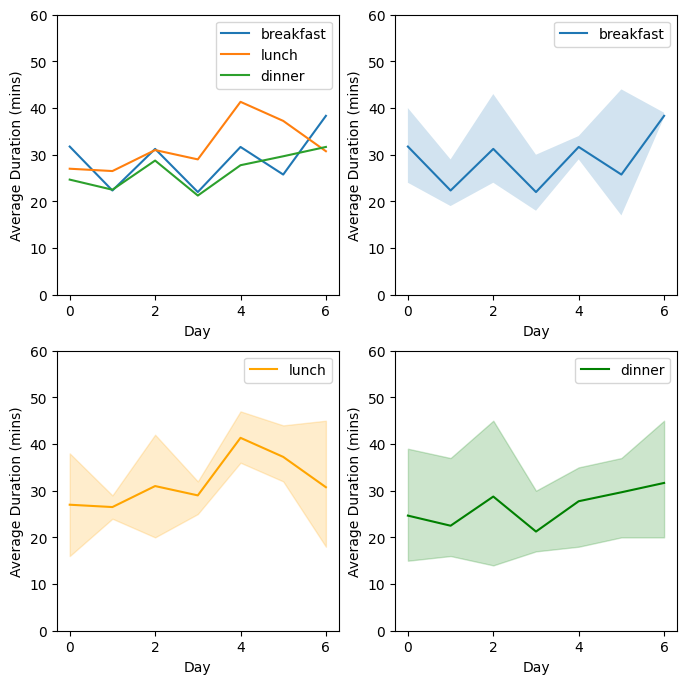

In [86]:
# Main Plot
breakfast_data = data[(data["Category"] == 0)]
lunch_data = data[(data["Category"] == 1)]
dinner_data = data[(data["Category"] == 2)]

ax, ay, amax, amin = prep_arr(breakfast_data[["Day", "Duration"]].to_numpy())
bx, by, bmax, bmin = prep_arr(lunch_data[["Day", "Duration"]].to_numpy())
cx, cy, cmax, cmin = prep_arr(dinner_data[["Day", "Duration"]].to_numpy())

# Create a series of subplots
fig, axs = plt.subplots(nrows=2, 
                        ncols=2,
                        figsize=(8, 8),
                        sharex=False,
                        sharey=False)

# Plot with all 3 meals
axs[0, 0].plot(ax, ay, label='breakfast')
axs[0, 0].plot(bx, by, label='lunch')
axs[0, 0].plot(cx, cy, label='dinner')

# Plot with just breakfast. (The shaded region represents the range)
axs[0, 1].plot(ax, ay, label='breakfast')
axs[0, 1].fill_between(ax, amin, amax, alpha=0.2)

# Plot with just lunch
axs[1, 0].plot(bx, by, label='lunch', color='orange')
axs[1, 0].fill_between(bx, bmin, bmax, alpha=0.2, color='orange')

# Plot with just dinner
axs[1, 1].plot(cx, cy, label='dinner', color='green')
axs[1, 1].fill_between(cx, cmin, cmax, alpha=0.2, color='green')

# Set the labels and legends
for ax in axs.flat:
    ax.set(xlabel='Day', ylabel='Average Duration (mins)', ylim=[0, 60])
    ax.legend()


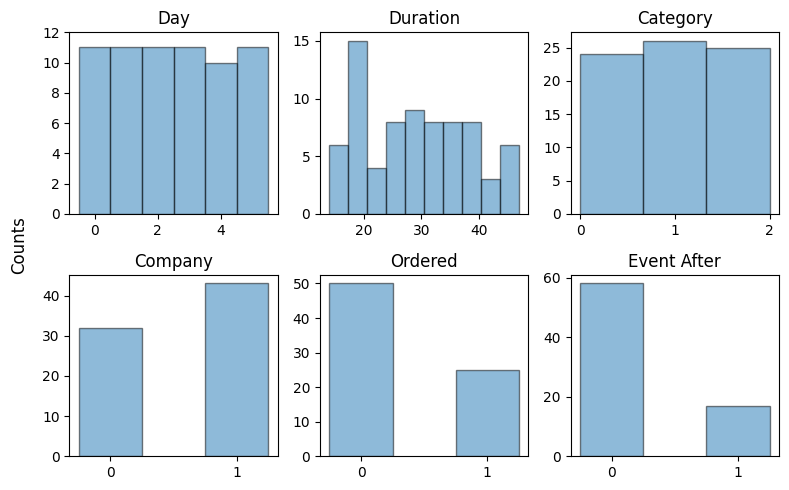

In [84]:
# Plot the histogram of the data
fig, axs = plt.subplots(nrows=2,
                        ncols=3,
                        figsize=(8, 5),
                        sharex=False,
                        sharey=False)

# Day vs. Count
axs[0, 0].hist(data['Day'], bins=np.arange(7)-0.5, ec='black', alpha=0.5)
axs[0, 0].set(ylim=[0, 12])
axs[0, 0].set_title('Day')

# Duration vs. Count
axs[0, 1].hist(data['Duration'], bins=10, ec='black', alpha=0.5)
axs[0, 1].set_title('Duration')


# Category vs. Count
axs[0, 2].hist(data['Category'], bins=3, ec='black', alpha=0.5)
axs[0, 2].set_title('Category')


# Company, Ordered, Event-After vs. Count
axs[1, 0].hist(data['Company'], bins=[-0.5, 0.5, 1.5], ec='black', alpha=0.5, rwidth=0.5)
axs[1, 0].set_title('Company')
axs[1, 1].hist(data['Ordered'], bins=[-0.5, 0.5, 1.5], ec='black', alpha=0.5, rwidth=0.5)
axs[1, 1].set_title('Ordered')
axs[1, 2].hist(data['Event After'], bins=[-0.5, 0.5, 1.5], ec='black', alpha=0.5, rwidth=0.5)
axs[1, 2].set_title('Event After')
for i in range(3):
    axs[1, i].set_xticks([0, 1])

fig.supylabel('Counts')

plt.tight_layout()
plt.show()

# Analysis of Start Time and Duration

### Start Time
- *Breakfast*: We can see the times cluster around an earlier time and a later time. This is because there might be classes at $9$:$00$, forcing people to eat earlier. If there is no such constraint, you can have breakfast at your leisure.
- *Lunch*: We see a similar trend for lunch, but for a different reason. When classes end at $1$:$00$, students directly go to the mess to eat. However, they tend to go later if there is no class at that time.
- *Dinner*: The above trends aren't observed for dinner, and there is just a central peak at around $20$:$00$.

### Duration
- *Breakfast*: Breakfast tends to be quick, and the plot is skewed to the left.
- *Lunch*: Lunch seems to be either quick or long; this could be due to several reasons: classes, company, etc.
- *Dinner*: A similar trend is observed for dinner; it is either quick or long.

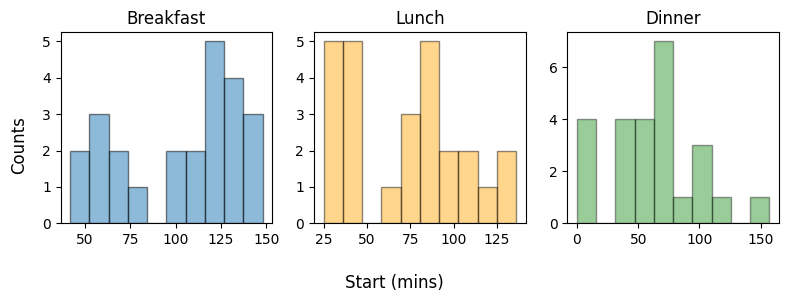

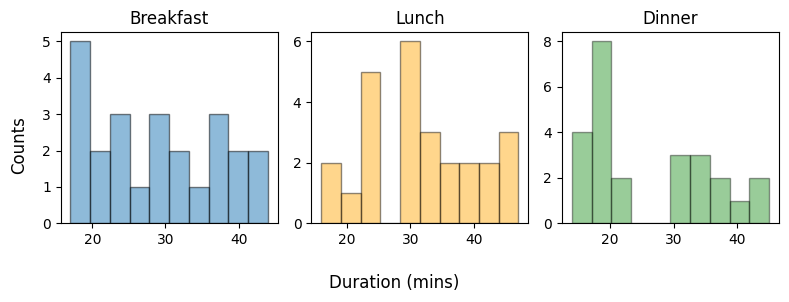

In [116]:
keys = ['Start', 'Duration']

for key in keys:
    # Plot subplots of start times by meal category
    fig, axs = plt.subplots(nrows=1,
                            ncols=3,
                            figsize=(8, 3),
                            sharex=False,
                            sharey=False)

    # Breakfast histogram
    axs[0].hist(breakfast_data[key], bins=10, ec='black', alpha=0.5)
    axs[0].set_title('Breakfast')

    # Lunch histogram
    axs[1].hist(lunch_data[key], bins=10, ec='black', alpha=0.45, color='orange')
    axs[1].set_title('Lunch')

    # Dinner histogram
    axs[2].hist(dinner_data[key], bins=10, ec='black', alpha=0.4, color='green')
    axs[2].set_title('Dinner')

    # Set labels
    fig.supxlabel(f'{key} (mins)')
    fig.supylabel('Counts')
    plt.tight_layout()

# Correlation Heatmap
Plotting a heatmap of the correlation matrix of the dataset gives us a good idea of which features are correlated with the target variables.
- **Day**: It is positively correlated with the target variable. This can also be seen from the upward trends in the Day vs Duration plots. The meals tend to be longer on weekends.
- **Start** and **Category**: These are very weakly correlated with the target variable.
- **Company**: It is strongly positively correlated with the target variable. The meals tend to be much longer when you're with a group.
- **Ordered**: This is also positively correlated. The meals are longer when you order / go to a restaurant.
- **Event After**: This is negatively correlated. The meals are shorter when you have an event after, because you have to hurry up.

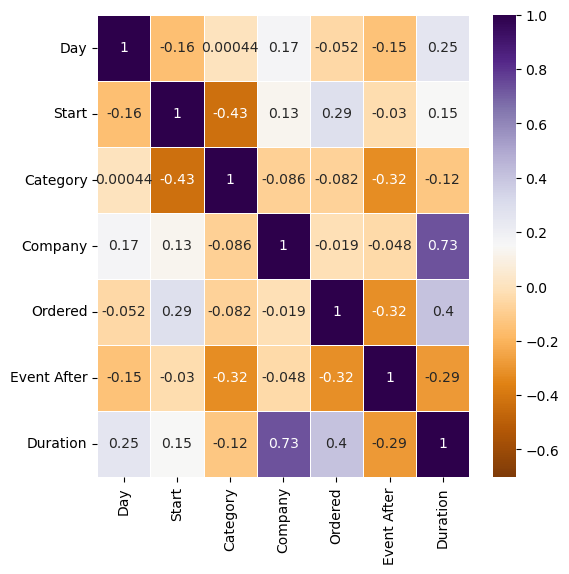

In [113]:
# Sample correlations using Seaborn heatmap
correlation = data.corr()
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor="white",vmin=-0.7, cmap="PuOr")